# Exploratory Data Analysis
To get a sense of the data we're working with, we can use exploratory data analysis to our data. Specifically, here are some questions we can answer:

1. Who are the top artists throughout the decade?
1. How does the distribution of the artists change throughout the decades? Is it easier or harder to break into the charts nowadays?
1. How does longevity (weeks on board) on the charts change throughout the decades? Do charting songs last longer now than it did before?
1. How do the different audio features change over the decade?

Since we already serialized the cleaned `DataFrame`, we can use this to explore the data and answer our questions.

In [2]:
%cd ..

d:\Y3T1\CSMODEL\notebooks\exploring-billboard-data


In [3]:
import pandas as pd
cleaned_charts_df = pd.read_pickle('./data/pkls/charts_with_audio_features_df.pkl')

## Top artists per decade
There are different ways to interpret this investigation. One is to look at total weeks charting. If an artist is relevant through the decades, they must have staying power in the charts. Another way is to look at the number of entries in the chart. More outputs or songs charting means that an artist may capture the heart of the masses.

### By total weeks charting
Here we see the top 10 artists who have the highest total weeks on board. The 60s are dominated by The Beach Boys, The Temptations and Brenda Lee. The 70s are dominated by Bee Gees, Carpenters and Stevie Wonder. Kool & The Gang, Lionel Richie and Madonna dominated the 80s while Mariah Carey, TLC and Boyz II Men dominated the 90s. In the 2000s, Nickelback, 3 Doors Down and Taylor Swift had the longest weeks charting while 2010s saw, once again, Taylor Swift, Drake and Imagine Dragons.

In [5]:
total_weeks_on_board = cleaned_charts_df[['decade', 'artist', 'weeks-on-board']].groupby(['decade', 'artist'], as_index=False).agg('sum')
total_weeks_on_board = total_weeks_on_board.sort_values(by=['decade', 'weeks-on-board'], ascending=[True, False]).groupby('decade').head(5)
total_weeks_on_board

,decade,artist,weeks-on-board
335,1960,The Beach Boys,225
445,1960,The Temptations,206
49,1960,Brenda Lee,203
296,1960,Sam Cooke,198
68,1960,Chubby Checker,184
524,1970,Bee Gees,279
580,1970,Carpenters,247
979,1970,Stevie Wonder,235
669,1970,Elton John,226
1071,1970,The Stylistics,196


Visually, we can see an upward trend on the longevity of songs in the charts with the 2010s being the most drastic increase probably due to the addition of streaming platforms in the latter half of the decade.

<AxesSubplot: xlabel='artist'>

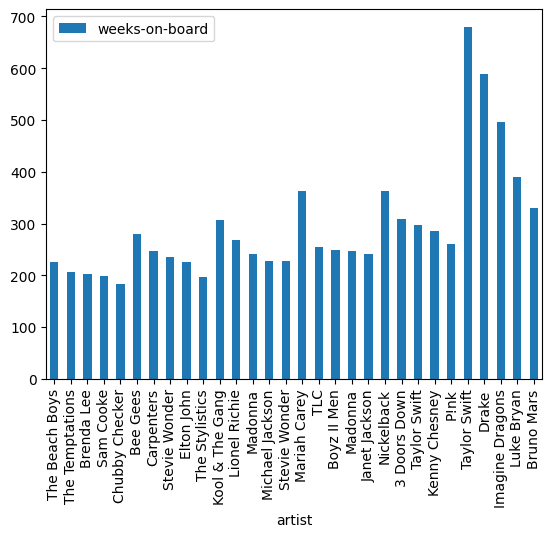

In [7]:
total_weeks_on_board.plot(x='artist', y='weeks-on-board', kind ='bar')

### By number of entries

As for basing this metric on the number of entries, we have similar results albeit different results.

In [8]:
entries = cleaned_charts_df[['decade', 'artist']].groupby(['decade', 'artist'], as_index=False).size()
entries = entries.sort_values(by=['decade', 'size'], ascending=[True, False]).groupby('decade').head(5)
entries

,decade,artist,size
127,1960,Frank Sinatra,24
296,1960,Sam Cooke,21
335,1960,The Beach Boys,21
445,1960,The Temptations,20
10,1960,Aretha Franklin,17
580,1970,Carpenters,20
524,1970,Bee Gees,18
877,1970,Neil Diamond,18
979,1970,Stevie Wonder,18
669,1970,Elton John,17


Like the previous metric, we see a drastic change in the 2010s. Again, this may be attributed to the rise of streaming and how it makes it easy to stream specific songs.

<AxesSubplot: xlabel='artist'>

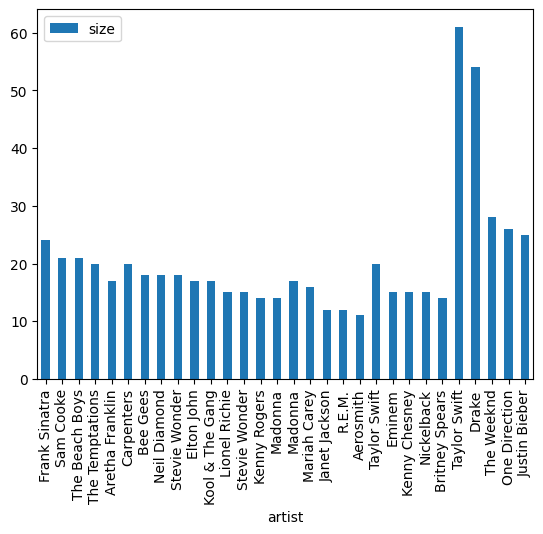

In [9]:
entries.plot(x='artist', y='size', kind ='bar')

To reiterate, it is important to remember that this might not reflect the truest record because of the limitations stated in the earlier notebook. Simply, interpret this result as a snapshot of each decades.

## Distribution of artist
Another interesting aspect we might want to explore is the distribution of artists throughout the decade. Is it easier for newer artists to break in to the industry? Or are there clear icons that are cemented in each decade?

We can count the unique number of artists in each decade to answer this.

In [10]:
artist_distribution = cleaned_charts_df[['decade', 'artist']].groupby('decade').count()
artist_distribution

,artist
decade,
1960,1532
1970,1689
1980,1815
1990,1413
2000,1371
2010,1522


As we can see in the plot, there seems to be an increase of artists from the 60s up to the 80s. The turning point in this is the 90s and 2000s where it sees a sharp decrease. 

One possible reason for this is the rise of the MTV generation. In the latter half of 90s and early 2000s, it isn't simply about the music anymore. Society has cemented cultural icons via music videos and televised performances. Think Lady Gaga and Katy Perry. With this, it is much harder to break into the industry as there are already recognized popstars.

However in 2010s, it seems to improve a bit. This may due to the democratization of production and distribution. Through social media, Spotify and Tiktok, breakout stars are more common with the likes of Doja Cat, Olivia Rodrigo, Billie Eillish and Noah Kahan.

<AxesSubplot: xlabel='decade'>

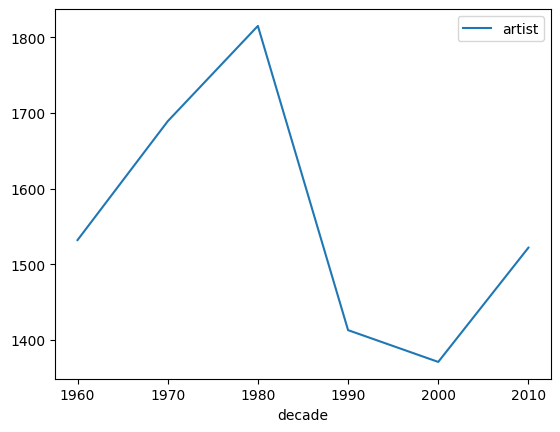

In [11]:
artist_distribution.plot()

## Longevity of songs on the chart

Next we explore how long an average song lasts within each decade. Here, we summarize it with three possible metrics: mean, median and the standard deviation.

In [20]:
longevity_per_decade = cleaned_charts_df[['decade', 'weeks-on-board']].groupby('decade').agg(['mean', 'median', 'std'])
longevity_per_decade

weeks-on-board                  
                 mean median        std
decade                                 
1960         9.657963   10.0   4.377125
1970        12.213144   12.0   5.876457
1980        14.498072   15.0   6.293350
1990        17.207360   18.0   8.440352
2000        17.970095   20.0  10.128005
2010        15.807490   17.0  12.458441

Up until the 90s, we see that the songs last longer on average. We also see that the mean and median are close to each other which may signify that the distribution is normal (not a guarantee, however).

The 2000s become the peak but in this decade, we see that the mean is lower than the median. This may signify that many songs chart in fewer weeks than most, skewing the mean and the distribution lower.

It is also interesting to note that the standard deviation increases as well, indicating that songs have a wider range of staying power.

<AxesSubplot: xlabel='decade'>

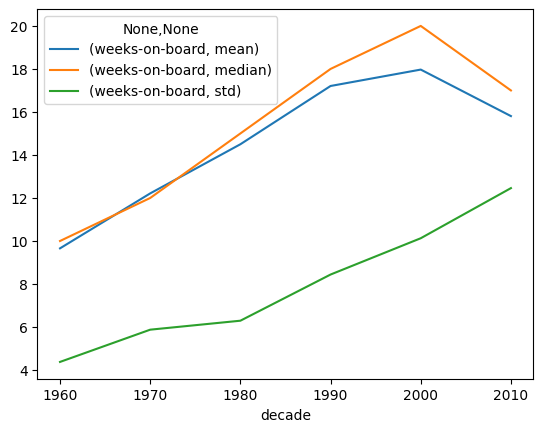

In [21]:
longevity_per_decade.plot()

## Audio features throughout the decade

In [ ]:
duration_ms_per_decade = cleaned_charts_df.groupby('decade').aggregate(['mean', 'median', 'std'])['duration_ms']
duration_ms_per_decade

In [ ]:
duration_ms_per_decade.plot()

In [ ]:
import src.eda as eda

In [ ]:
danceability_per_decade = eda.get_audio_feature_summary(cleaned_charts_df, 'danceability')
danceability_per_decade

In [ ]:
danceability_per_decade.plot()

In [ ]:
energy_per_decade = eda.get_audio_feature_summary(cleaned_charts_df, 'energy')
energy_per_decade

In [ ]:
energy_per_decade.plot()

In [ ]:
loudness_per_decade = eda.get_audio_feature_summary(cleaned_charts_df, 'loudness')
loudness_per_decade

In [ ]:
loudness_per_decade.plot()

In [ ]:
acousticness_per_decade = eda.get_audio_feature_summary(cleaned_charts_df, 'acousticness')
acousticness_per_decade

In [ ]:
acousticness_per_decade.plot()

In [ ]:
valence_per_decade = eda.get_audio_feature_summary(cleaned_charts_df, 'valence')
valence_per_decade

In [ ]:
valence_per_decade.plot()

# Research Question
With our initial exploratory in mind, we can create a research question that can be solved by statistical modelling and simulation.

Since we saw how each decade finds different audio features, perhaps we can find specific categories that signify that a song could be a hit in a particular era. In this case, we need a clustering technique to do it.

With this our research question would be:
- What are the types or clusters of songs that are charting in each decade of the Billboard Hot 100?